In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from os import listdir
import pandas as pd
import numpy as np

In [3]:
from dlmi.visualization import *
from dlmi.utils import get_size_of_file

In [4]:
colors = ['#D7191C', '#2C7BB6', '#0D8A51']

# Graph 1 -- SIFT -- 1M

In [44]:
sift_dyn_base = '../experiments/2022-11-23--19-44-31-13364399-SIFT-1000000-adan6.grid.cesnet.cz'
sift_bulk_1k = '../experiments/2022-12-07--20-05-52-13604823-SIFT-bulk-MLP-10000-adan34.grid.cesnet.cz'
sift_bulk_10k = '../experiments/2022-12-08--08-35-39-13606979-SIFT-bulk-MLP-100000-adan31.grid.cesnet.cz'
sift_bulk_100k = '../experiments/2022-12-08--20-18-43-13609991-SIFT-bulk-MLP-1000000-adan5.grid.cesnet.cz'
sift_bulk_1M = '../experiments/2022-12-30--18-38-41-13825624-SIFT-bulk-MLP-1000000-adan6.grid.cesnet.cz'

In [45]:
sift_naive = '../experiments/2022-12-31--11-47-28-13827757-SIFT-bulk-MLP-100000-adan6.grid.cesnet.cz'
build_1k = pd.read_csv(f'{sift_bulk_1k}/build/csv/build-0.csv')

In [46]:
build_dyn = pd.read_csv(f'{sift_dyn_base}/build/csv/build-36.csv')

In [47]:
build_1k = pd.read_csv(f'{sift_bulk_1k}/build/csv/build-0.csv')
build_10k = pd.read_csv(f'{sift_bulk_10k}/build/csv/build-0.csv')
build_100k = pd.read_csv(f'{sift_bulk_100k}/build/csv/build-0.csv')
build_1M = pd.read_csv(f'{sift_bulk_1M}/build/csv/build-100.csv')

In [54]:
def extract_dynamic_info(info_df):
    x = info_df[info_df['op'] == 'REORGANIZATION']['#-objects']
    x = [str(x_)[:-3] + 'k' if str(x_).endswith('000') else x_ for x_ in x]
    #x = [f'0.{str(x_)[0]}M' if str(x_).endswith('00') else x_ for x_ in x]
    y1 = info_df[info_df['op'] == 'REORGANIZATION']['time-taken'].cumsum()
    y2 = info_df[info_df['op'] == 'REORGANIZATION']['size']
    
    #target = [100, '1k', '10k', '100k', '1000k']
    x = list(info_df['#-objects'].unique())
    #target_idx = [x.index(i) for i in target]
    #x = np.array(x)[target_idx]
    #x[-1] = '1M'
    #y1 = np.array(y1)[x]
    #y2 = np.array(y2)[x] / 1000
    
    return x, y1, y2

In [55]:
x, y1, y2 = extract_dynamic_info(build_dyn)

In [56]:
x

[100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 20000,
 30000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000,
 100000,
 200000,
 300000,
 400000,
 500000,
 600000,
 700000,
 800000,
 900000,
 1000000]

In [11]:
import matplotlib
font = {'size': 18}

matplotlib.rc('font', **font)

In [12]:
def create_build_times_plot(axs, x, y1, title):
    colors = ['#D7191C', '#2C7BB6', '#0D8A51']
    axs.bar([i for i in range(len(x))], y1.values, width=0.8, label='Dynamic', color=colors[1], alpha=0.5)
    axs.set_xticks([i for i in range(len(x)) if i%2 == 0])
    x = [str(x_)[:-3] + 'k' if str(x_).endswith('000') else x_ for x_ in x]
    if len(x) == 37:
        x[-1] = '1M'
    elif len(x) == 41:
        x[-1] = '5M'; x[-2] = '4M'; x[-3] = '3M'; x[-4] = '2M'; x[-5] = '1M'
    axs.set_xticklabels([x_ for i,x_ in enumerate(x) if i%2 == 0])
    axs.grid(b=True, which='major', color='gray', linestyle='-', linewidth=0.2)
    axs.set_title(title)
    axs.set_xlabel('# objects')
    axs.set_ylabel('build time (s)')
    axs.set_yscale('log')
    axs.set_xlim(xmin=-1, xmax=len(x))
    return axs

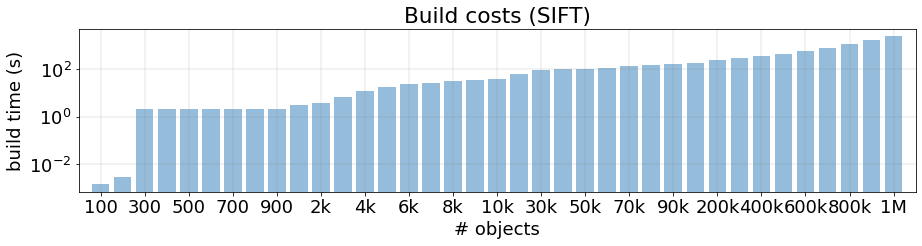

In [13]:
fig, axs = plt.subplots(figsize=(15, 3), ncols=1, nrows=1)
axs = create_build_times_plot(axs, x, y1, 'Build costs (SIFT)')

In [14]:
mapping = {
    1000: 9,
    10_000: 18,
    100_000: 27,
    1_000_000: 36
}

In [15]:
axs.bar(
    list(mapping.values()),
    [build_1k['time-taken'].sum(), build_10k['time-taken'].sum(), build_100k['time-taken'].sum(), build_1M['time-taken'].sum()],
    label='Static',
    color=colors[0],
    alpha=0.5
)

<BarContainer object of 4 artists>

In [16]:
axs.bar(
    list(mapping.values())[1:],
    [build_1k['time-taken'].sum(), build_10k['time-taken'].sum(), build_100k['time-taken'].sum()],
    label='Naive ins.',
    color=colors[2],
    alpha=0.5
)

<BarContainer object of 3 artists>

In [17]:
axs.legend()

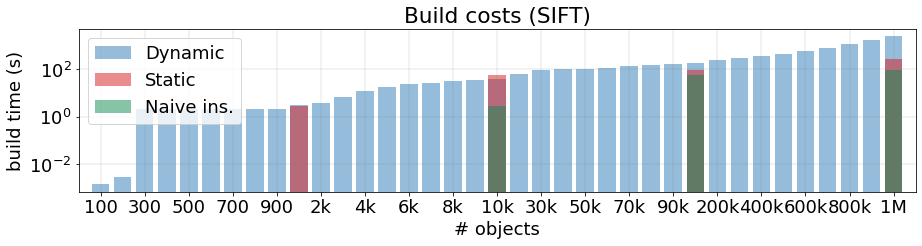

In [18]:
fig

In [19]:
fig.savefig('../figures/building-costs-sift.pdf', format='pdf', bbox_inches='tight')

In [20]:
fig.savefig('../figures/building-costs.png')

# Graph 2 -- Glove -- 10k -- step 18

In [21]:
glove_dyn_base = '../experiments/2022-12-06--13-02-27-13588498-GLOVE-1183514-adan4.grid.cesnet.cz'
glove_bulk_1k = '../experiments/2022-12-07--20-05-18-13604824-GLOVE-bulk-MLP-10000-adan57.grid.cesnet.cz'
glove_bulk_10k = '../experiments/2022-12-08--08-33-01-13606977-GLOVE-bulk-MLP-100000-adan32.grid.cesnet.cz'
glove_bulk_100k = '../experiments/2022-12-30--19-33-00-13825625-GLOVE-bulk-MLP-100000-adan4.grid.cesnet.cz'

In [22]:
build_dyn = pd.read_csv(f'{glove_dyn_base}/build/csv/build-36.csv')

In [23]:
build_1k = pd.read_csv(f'{glove_bulk_1k}/build/csv/build-0.csv')
build_10k = pd.read_csv(f'{glove_bulk_10k}/build/csv/build-0.csv')
build_100k = pd.read_csv(f'{glove_bulk_100k}/build/csv/build-100.csv')
build_1k['time-taken'].sum(), build_10k['time-taken'].sum()

(3.155341148376465, 41.50984477996826)

In [24]:
x, y1, y2 = extract_dynamic_info(build_dyn)

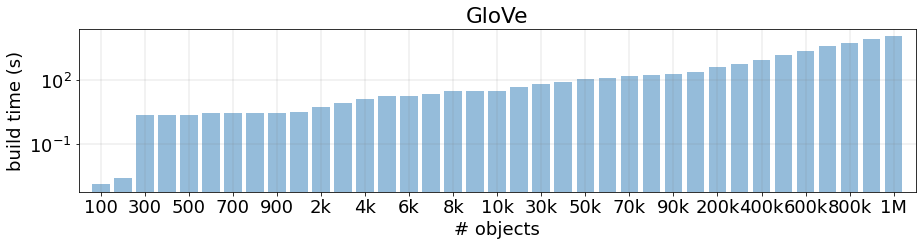

In [25]:
fig, axs = plt.subplots(figsize=(15, 3), ncols=1, nrows=1)
axs = create_build_times_plot(axs, x, y1, 'GloVe')

In [26]:
mapping = {
    1000: 9,
    10_000: 18,
    100_000: 27
}

In [27]:
axs.bar(
    list(mapping.values()),
    [build_1k['time-taken'].sum(), build_10k['time-taken'].sum(), build_100k['time-taken'].sum()],
    label='Static',
    color=colors[0],
    alpha=0.5
)

<BarContainer object of 3 artists>

In [28]:
axs.bar(
    list(mapping.values())[1:],
    [build_1k['time-taken'].sum(), build_10k['time-taken'].sum()],
    label='Naive ins.',
    color=colors[2],
    alpha=0.5
)

<BarContainer object of 2 artists>

In [29]:
axs.legend()

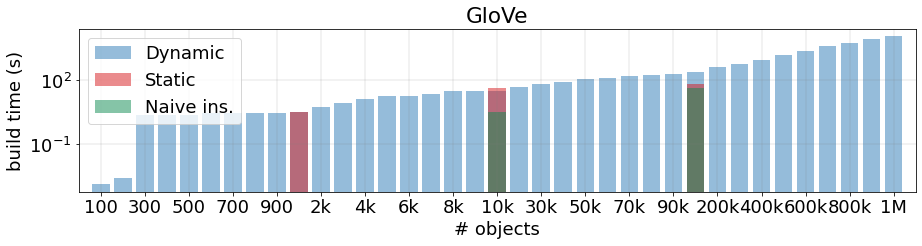

In [30]:
fig

In [31]:
fig.savefig('../figures/building-costs-glove.pdf', format='pdf', bbox_inches='tight')

In [32]:
fig.savefig('../figures/building-costs-glove.png')

# Graph 3 -- Deep1b -- 10k -- step 18

In [33]:
deep1b_dyn_base = '../experiments/2022-12-06--13-17-32-13588502-DEEP1B-9990000-adan8.grid.cesnet.cz'
deep1b_bulk_1k = '../experiments/2022-12-08--14-29-31-13609995-DEEP1B-bulk-MLP-10000-adan47.grid.cesnet.cz'
deep1b_bulk_10k = '../experiments/2022-12-08--08-46-31-13606976-DEEP1B-bulk-MLP-100000-adan7.grid.cesnet.cz'
deep1b_bulk_100k = '../experiments/2022-12-30--18-53-48-13825626-DEEP1B-bulk-MLP-100000-adan8.grid.cesnet.cz'

In [34]:
build_dyn = pd.read_csv(f'{deep1b_dyn_base}/build/csv/build-40.csv')
build_dyn.tail()

,op,time-taken,size,#-objects
34308,"RETRAIN-COLL-(0, 97, 44, 85)-6",0.068502,NaN,5000000
34309,"RETRAIN-PART-(0, 97, 44, 85)-6",0.001282,NaN,5000000
34310,"RETRAIN-TRAIN-(0, 97, 44, 85)-6",0.376932,NaN,5000000
34311,"RETRAIN-REST-(0, 97, 44, 85)-6",0.000716,NaN,5000000
34312,REORGANIZATION,109150.489658,5453.608484,5000000


In [35]:
build_1k = pd.read_csv(f'{deep1b_bulk_1k}/build/csv/build-0.csv')
build_10k = pd.read_csv(f'{deep1b_bulk_10k}/build/csv/build-0.csv')
build_100k = pd.read_csv(f'{deep1b_bulk_100k}/build/csv/build-100.csv')
build_10k['time-taken'].sum(), build_100k['time-taken'].sum()

(11.11246585845947, 56.19543814659119)

In [36]:
x, y1, y2 = extract_dynamic_info(build_dyn)

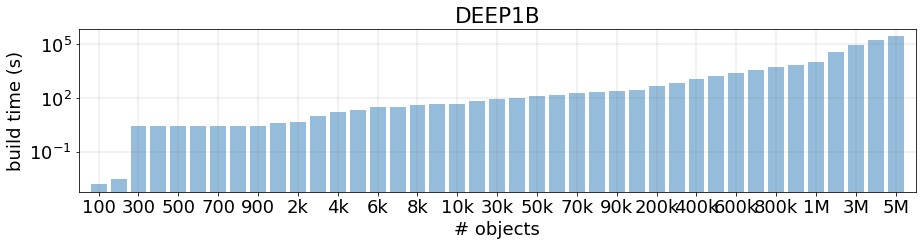

In [37]:
fig, axs = plt.subplots(figsize=(15, 3), ncols=1, nrows=1)
axs = create_build_times_plot(axs, x, y1, 'DEEP1B')

In [38]:
axs.bar(
    list(mapping.values()),
    [build_1k['time-taken'].sum(), build_10k['time-taken'].sum(), build_100k['time-taken'].sum()],
    label='Static',
    color=colors[0],
    alpha=0.5
)

<BarContainer object of 3 artists>

In [39]:
axs.bar(
    list(mapping.values())[1:],
    [build_1k['time-taken'].sum(), build_10k['time-taken'].sum()],
    label='Naive ins.',
    color=colors[2],
    alpha=0.5
)

<BarContainer object of 2 artists>

In [40]:
axs.legend()

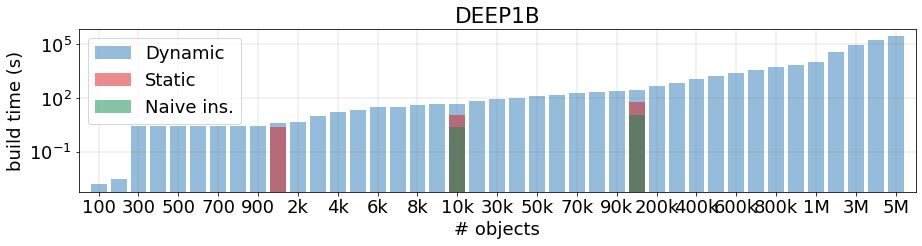

In [41]:
fig

In [42]:
fig.savefig('../figures/building-costs-deep1b.pdf', format='pdf', bbox_inches='tight')

In [43]:
fig.savefig('../figures/building-costs-deep1b.png')